In [39]:
# Preprocessing And Neural Network:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

# Evaluation: 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing: Step 1

In [4]:
sample_submission = pd.read_csv('Sample_Submission.csv')

In [5]:
sample_submission.head()

,0,1
0,0.005016,0.994984
1,0.612204,0.387796
2,0.844945,0.155055
3,0.004671,0.995329
4,0.175931,0.824069


In [6]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [7]:
test.shape

(233, 7)

In [9]:
train.shape

(543, 8)

In [11]:
train.isna().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [ ]:
nulls_train = train.isnull().sum()
nulls_train

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [ ]:
nulls_percentage = nulls_train[nulls!=0]/train.shape[0]*100
print('the percentages of null values per feature:\n')
print(round(nulls_percentage,2))

the percentages of null values per feature:

Series([], dtype: float64)


In [ ]:
features_original = train.shape[1]
train.dropna(axis='columns',how='any',inplace=True)
features_reduced = train.shape[1]
print('number of features reduced from %d to %d'%(features_original,features_reduced))

number of features reduced from 8 to 8


In [ ]:
train.count()

City                    543
Location_Score          543
Internal_Audit_Score    543
External_Audit_Score    543
Fin_Score               543
Loss_score              543
Past_Results            543
IsUnderRisk             543
dtype: int64

In [ ]:
test.count()

City                    233
Location_Score          233
Internal_Audit_Score    233
External_Audit_Score    233
Fin_Score               233
Loss_score              233
Past_Results            233
dtype: int64

In [ ]:
nulls_test = test.isnull().sum()
nulls_test

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [ ]:
print('total number of features: %d\n'%(train.shape[1]))
train.dtypes

total number of features: 8



City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

In [ ]:
print('total number of features: %d\n'%(test.shape[1]))
test.dtypes

total number of features: 7



City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


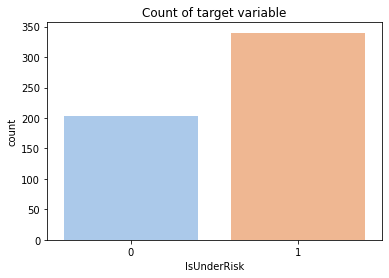

In [12]:
sns.countplot(train['IsUnderRisk'], palette = 'pastel')
plt.title('Count of target variable')
plt.show()

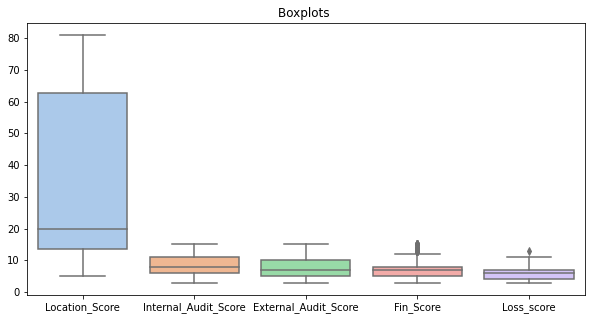

In [13]:
cont_var = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']

plt.figure(figsize = (10,5))
sns.boxplot(data= train[cont_var], palette = 'pastel')
plt.title('Boxplots ')
plt.show()

In [ ]:
train

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
...,...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1,0
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1


Separating Target Variable

In [24]:
x = train.drop(['IsUnderRisk'], axis=1)
y = train.IsUnderRisk

In [27]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.20)

Normalizing Data

DNN Model

In [28]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [30]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=2)

In [31]:
history1 = model.fit(x=x_train, y=y_train, epochs=200, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/200
14/14 [==============================] - 1s 17ms/step - loss: 0.9734 - accuracy: 0.6452 - val_loss: 0.5859 - val_accuracy: 0.7706
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.6912 - val_loss: 0.5412 - val_accuracy: 0.6789
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 0.5574 - accuracy: 0.7327 - val_loss: 0.5163 - val_accuracy: 0.6789
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5482 - accuracy: 0.7258 - val_loss: 0.4983 - val_accuracy: 0.7156
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.7558 - val_loss: 0.5214 - val_accuracy: 0.7798
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 0.5665 - accuracy: 0.7281 - val_loss: 0.5244 - val_accuracy: 0.7523
Epoch 6: early stopping


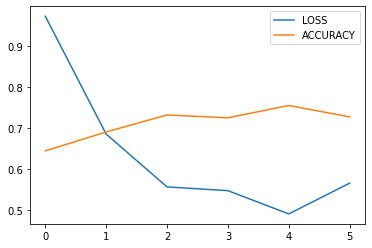

In [33]:
plt.plot(history1.history['loss'], label="LOSS")
plt.plot(history1.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

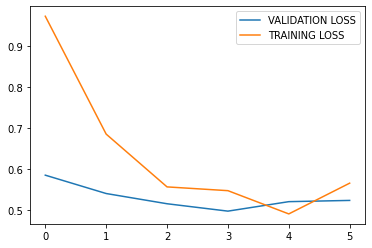

In [34]:
plt.plot(history1.history['val_loss'], label="VALIDATION LOSS")
plt.plot(history1.history['loss'], label="TRAINING LOSS")
plt.legend(loc='best')
plt.show()

Predicting on test set

In [35]:
y_pred_prob = model.predict(x_test)

In [40]:
y_pred = []
for prob in y_pred_prob:
    if prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
print(confusion_matrix(y_test, y_pred))

[[34  9]
 [18 48]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.72        43
           1       0.84      0.73      0.78        66

    accuracy                           0.75       109
   macro avg       0.75      0.76      0.75       109
weighted avg       0.77      0.75      0.75       109



ROC-AUC Score:

In [43]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score for the DNN model-1 is", np.round(roc_auc,2))

ROC-AUC Score for the DNN model-1 is 0.76


One-Hot Encoding target variable

In [44]:
y_ = np.array(train['IsUnderRisk']).reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [46]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.20)

DNN Model 2

In [47]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [48]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
history2 = model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 6ms/step - loss: 0.6925 - accuracy: 0.7189
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7581
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.7811
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7442
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7903
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7903
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7926
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.7857
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4259 - accuracy: 0.7788
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8065
Epoch 11/

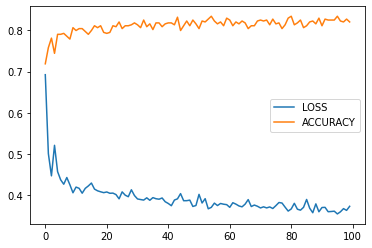

In [50]:
plt.plot(range(100), history2.history['loss'], label="LOSS")
plt.plot(range(100), history2.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

Prediction: 

In [51]:
y_pred = model.predict(x_test)

In [52]:
ll = log_loss(y_test, y_pred)
print("Log-Loss Error for the DNN model-2 is", np.round(ll,2))

Log-Loss Error for the DNN model-2 is 0.58
